In [24]:
import pandas as pd
data = pd.read_csv('data/VT-clean.csv')
df = pd.DataFrame(data)

df.info()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283285 entries, 0 to 283284
Data columns (total 23 columns):
id                       283285 non-null object
state                    283285 non-null object
stop_date                283285 non-null object
stop_time                283285 non-null object
location_raw             282591 non-null object
county_name              282580 non-null object
county_fips              282580 non-null float64
fine_grained_location    282938 non-null object
police_department        283285 non-null object
driver_gender            281573 non-null object
driver_age_raw           282114 non-null float64
driver_age               281999 non-null float64
driver_race_raw          279301 non-null object
driver_race              278468 non-null object
violation_raw            281107 non-null object
violation                281107 non-null object
search_conducted         283285 non-null bool
search_type_raw          281045 non-null object
search_type             

In [25]:
#Filter 2015 Traffic data based on year in the stop_date column
traffic_2015 = df.loc[pd.to_datetime(df['stop_date']).dt.year == 2015]
traffic_2015.to_csv('data/VT_2015.csv')

In [28]:
traffic_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45662 entries, 237623 to 283284
Data columns (total 23 columns):
id                       45662 non-null object
state                    45662 non-null object
stop_date                45662 non-null object
stop_time                45662 non-null object
location_raw             45634 non-null object
county_name              45631 non-null object
county_fips              45631 non-null float64
fine_grained_location    45623 non-null object
police_department        45662 non-null object
driver_gender            45440 non-null object
driver_age_raw           45143 non-null float64
driver_age               45119 non-null float64
driver_race_raw          44984 non-null object
driver_race              44745 non-null object
violation_raw            45479 non-null object
violation                45479 non-null object
search_conducted         45662 non-null bool
search_type_raw          45470 non-null object
search_type              591 non-null 

In [30]:
traffic_2015[traffic_2015.duplicated(['id'])]

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id


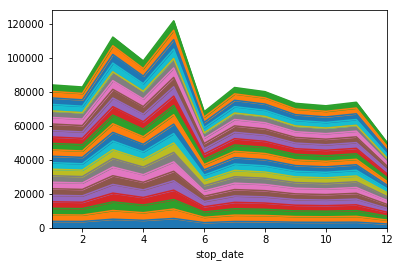

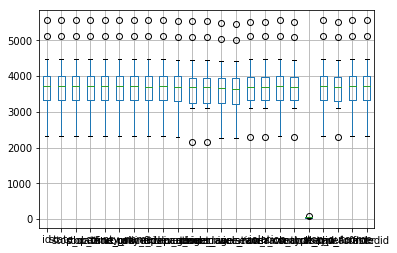

In [49]:
monthly_traffic = traffic_2015.groupby(pd.to_datetime(traffic_2015['stop_date']).dt.month).count()
monthly_traffic.plot.area(legend = False )
import matplotlib.pyplot as plt
plt.show()
monthly_traffic.boxplot()
plt.show()

In [51]:
VT_traf_2015_main = traffic_2015.dropna(subset = ['violation', 'stop_outcome'])

In [52]:
print(VT_traf_2015_main)

                   id state   stop_date stop_time    location_raw  \
237623  VT-2015-00001    VT  2015-01-01     00:00           Derby   
237624  VT-2015-00002    VT  2015-01-01     00:20       New Haven   
237625  VT-2015-00003    VT  2015-01-01     00:20        Hartford   
237626  VT-2015-00004    VT  2015-01-01     00:30       New Haven   
237627  VT-2015-00005    VT  2015-01-01     00:34        Hartford   
237628  VT-2015-00006    VT  2015-01-01     00:35     Bridgewater   
237629  VT-2015-00007    VT  2015-01-01     00:45     Lyndonville   
237630  VT-2015-00008    VT  2015-01-01     00:50        Hartford   
237632  VT-2015-00010    VT  2015-01-01     00:52          Bethel   
237633  VT-2015-00011    VT  2015-01-01     00:53     Bridgewater   
237634  VT-2015-00012    VT  2015-01-01     00:55       New Haven   
237635  VT-2015-00013    VT  2015-01-01     00:57        Hartford   
237636  VT-2015-00014    VT  2015-01-01     01:00        Hartford   
237637  VT-2015-00015    VT  2015-

In [67]:
import numpy as np
VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=['driver_age'], columns=['driver_gender'], 
                            aggfunc=np.count_nonzero)
#VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=np.floor_divide(VT_traf_2015_main['driver_age'], 5), columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_age)

driver_gender      F      M
driver_age                 
15.0             5.0    6.0
16.0            56.0   83.0
17.0           201.0  339.0
18.0           326.0  608.0
19.0           453.0  890.0
20.0           496.0  894.0
21.0           504.0  940.0
22.0           567.0  854.0
23.0           543.0  891.0
24.0           556.0  916.0
25.0           509.0  854.0
26.0           448.0  830.0
27.0           465.0  758.0
28.0           472.0  739.0
29.0           420.0  715.0
30.0           421.0  659.0
31.0           420.0  615.0
32.0           354.0  607.0
33.0           325.0  574.0
34.0           305.0  581.0
35.0           313.0  554.0
36.0           305.0  507.0
37.0           278.0  456.0
38.0           288.0  487.0
39.0           284.0  454.0
40.0           264.0  500.0
41.0           284.0  448.0
42.0           262.0  463.0
43.0           230.0  463.0
44.0           271.0  491.0
...              ...    ...
66.0           111.0  208.0
67.0           100.0  212.0
68.0           111.0

In [76]:
VT_agg_month = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])
                                                                     .dt.month], columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_month)

driver_gender     F     M
stop_date                
1              1334  2465
2              1240  2509
3              1809  3265
4              1639  2793
5              2094  3404
6              1113  1977
7              1391  2345
8              1304  2318
9              1219  2096
10             1210  2030
11             1250  2105
12              794  1504


In [77]:
VT_agg_time = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour, columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_time)

driver_gender     F     M
stop_time                
0               504  1151
1               278   737
2               118   376
3                27   105
4                 9    46
5                20    81
6                97   195
7               475   659
8               856  1229
9               886  1485
10              798  1238
11              606   948
12              448   812
13              697  1195
14              990  1705
15             1171  1916
16             1124  1875
17             1771  2909
18             1861  3132
19             1089  1943
20              626  1173
21              631  1203
22              683  1327
23              632  1371


In [79]:

VT_agg_day = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(df['stop_date']).
                            dt.dayofweek, columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_day)


driver_gender     F     M
stop_date                
0              2423  3803
1              2238  3665
2              2379  4009
3              2308  4017
4              2823  5094
5              2271  4449
6              1955  3774
